In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
data=pd.read_csv('student_performance_new.csv')

In [3]:
data.head(10)

,Sl.No.,USN,STUDENT NAME,Test I,Test II,Test III,Test Total,Test Result,Quiz 1,Quiz 2,Compensatory,Quiz,Quiz Result,Test + Quiz,Assignment 1,Assignment 2,Assignment Result,Result
0,1,1RV21MC001,ABHISHEK M,34,39,14,29.000000,1,4.0,6.0,10.0,16.0,1,45.000000,14,13,1,1
1,2,1RV21MC006,AJITH KUMAR K,30,33,27,30.000000,1,6.5,6.0,9.0,15.5,1,45.500000,14,13,1,1
2,3,1RV21MC009,AKASH E PUNAGIN,28,36,22,28.666667,1,7.0,5.0,NaN,12.0,1,40.666667,14,13,1,1
3,4,1RV21MC011,AMIT KUMAR,16,28,32,25.333333,1,3.0,2.0,10.0,13.0,1,38.333333,13,13,1,1
4,5,1RV21MC012,ANANDGOUDA PATIL,25,42,27,31.333333,1,6.0,5.0,10.0,16.0,1,47.333333,13,14,1,1
5,6,1RV21MC022,BHAKTHI PRABHU,27,33,22,27.333333,1,6.5,4.0,10.0,16.5,1,43.833333,14,14,1,0
6,7,1RV21MC025,BHAT DIVYA SUBRAHMANYA,32,45,28,35.000000,1,7.5,8.0,7.0,15.0,1,50.000000,15,15,1,0
7,8,1RV21MC027,CHANDAN B REDDY,12,22,17,17.000000,0,6.0,5.0,10.0,16.0,1,33.000000,13,14,1,1
8,9,1RV21MC029,CHANDANA M,20,33,20,24.333333,0,5.0,4.0,8.0,13.0,1,37.333333,14,14,1,1
9,10,1RV21MC031,D S HARSHITHA,22,30,18,23.333333,0,3.5,5.0,10.0,15.0,1,38.333333,14,14,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sl.No.              54 non-null     int64  
 1   USN                 54 non-null     object 
 2   STUDENT NAME        54 non-null     object 
 3   Test I              54 non-null     int64  
 4   Test II             54 non-null     int64  
 5   Test III            54 non-null     int64  
 6   Test Total          54 non-null     float64
 7   Test Result         54 non-null     int64  
 8   Quiz 1              54 non-null     float64
 9   Quiz 2              54 non-null     float64
 10  Compensatory        53 non-null     float64
 11  Quiz                54 non-null     float64
 12  Quiz Result         54 non-null     int64  
 13  Test + Quiz         54 non-null     float64
 14  Assignment 1        54 non-null     int64  
 15  Assignment 2        54 non-null     int64  
 16  Assignment

In [5]:
data.columns

Index(['Sl.No.', 'USN', 'STUDENT NAME', 'Test I ', 'Test II ', 'Test III',
       'Test Total ', 'Test Result ', 'Quiz 1', 'Quiz 2', 'Compensatory',
       'Quiz', 'Quiz Result ', 'Test + Quiz', 'Assignment 1', 'Assignment 2',
       'Assignment Result ', 'Result'],
      dtype='object')

In [6]:
data.isna().sum()

Sl.No.                0
USN                   0
STUDENT NAME          0
Test I                0
Test II               0
Test III              0
Test Total            0
Test Result           0
Quiz 1                0
Quiz 2                0
Compensatory          1
Quiz                  0
Quiz Result           0
Test + Quiz           0
Assignment 1          0
Assignment 2          0
Assignment Result     0
Result                0
dtype: int64

In [7]:
data['Compensatory'].fillna(data['Compensatory'].mean(), inplace=True)
print(data.isnull().sum())

Sl.No.                0
USN                   0
STUDENT NAME          0
Test I                0
Test II               0
Test III              0
Test Total            0
Test Result           0
Quiz 1                0
Quiz 2                0
Compensatory          0
Quiz                  0
Quiz Result           0
Test + Quiz           0
Assignment 1          0
Assignment 2          0
Assignment Result     0
Result                0
dtype: int64


In [96]:
data.head(10)

,Sl.No.,USN,STUDENT NAME,Test I,Test II,Test III,Test Total,Test Result,Quiz 1,Quiz 2,...,Assignment 2,Assignment Result,Result,27,26,28,30,29,25,Assignment
0,1,1RV21MC001,ABHISHEK M,34,39,14,29.000000,1,4.0,6.0,...,13,1,1,27,26,28,30,29,25,27
1,2,1RV21MC006,AJITH KUMAR K,30,33,27,30.000000,1,6.5,6.0,...,13,1,1,27,26,28,30,29,25,27
2,3,1RV21MC009,AKASH E PUNAGIN,28,36,22,28.666667,1,7.0,5.0,...,13,1,1,27,26,28,30,29,25,27
3,4,1RV21MC011,AMIT KUMAR,16,28,32,25.333333,1,3.0,2.0,...,13,1,1,27,26,28,30,29,25,26
4,5,1RV21MC012,ANANDGOUDA PATIL,25,42,27,31.333333,1,6.0,5.0,...,14,1,1,27,26,28,30,29,25,27
5,6,1RV21MC022,BHAKTHI PRABHU,27,33,22,27.333333,1,6.5,4.0,...,14,1,0,27,26,28,30,29,25,28
6,7,1RV21MC025,BHAT DIVYA SUBRAHMANYA,32,45,28,35.000000,1,7.5,8.0,...,15,1,0,27,26,28,30,29,25,30
7,8,1RV21MC027,CHANDAN B REDDY,12,22,17,17.000000,0,6.0,5.0,...,14,1,1,27,26,28,30,29,25,27
8,9,1RV21MC029,CHANDANA M,20,33,20,24.333333,0,5.0,4.0,...,14,1,1,27,26,28,30,29,25,28
9,10,1RV21MC031,D S HARSHITHA,22,30,18,23.333333,0,3.5,5.0,...,14,1,1,27,26,28,30,29,25,28


In [8]:
X=data[['Test Total ','Quiz','Assignment Result ']]
y=data['Result']

In [11]:
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [12]:
DecisionTree=DecisionTreeClassifier(random_state=42)

In [13]:
DecisionTree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
y_train_pred = DecisionTree.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))

Training Accuracy: 100.00%


In [27]:
y_pred=DecisionTree.predict(X_test)

In [28]:
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Test Accuracy: 72.73%


In [29]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [31]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.7272727272727273
Confusion Matrix:
[[3 3]
 [0 5]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.62      1.00      0.77         5

    accuracy                           0.73        11
   macro avg       0.81      0.75      0.72        11
weighted avg       0.83      0.73      0.71        11



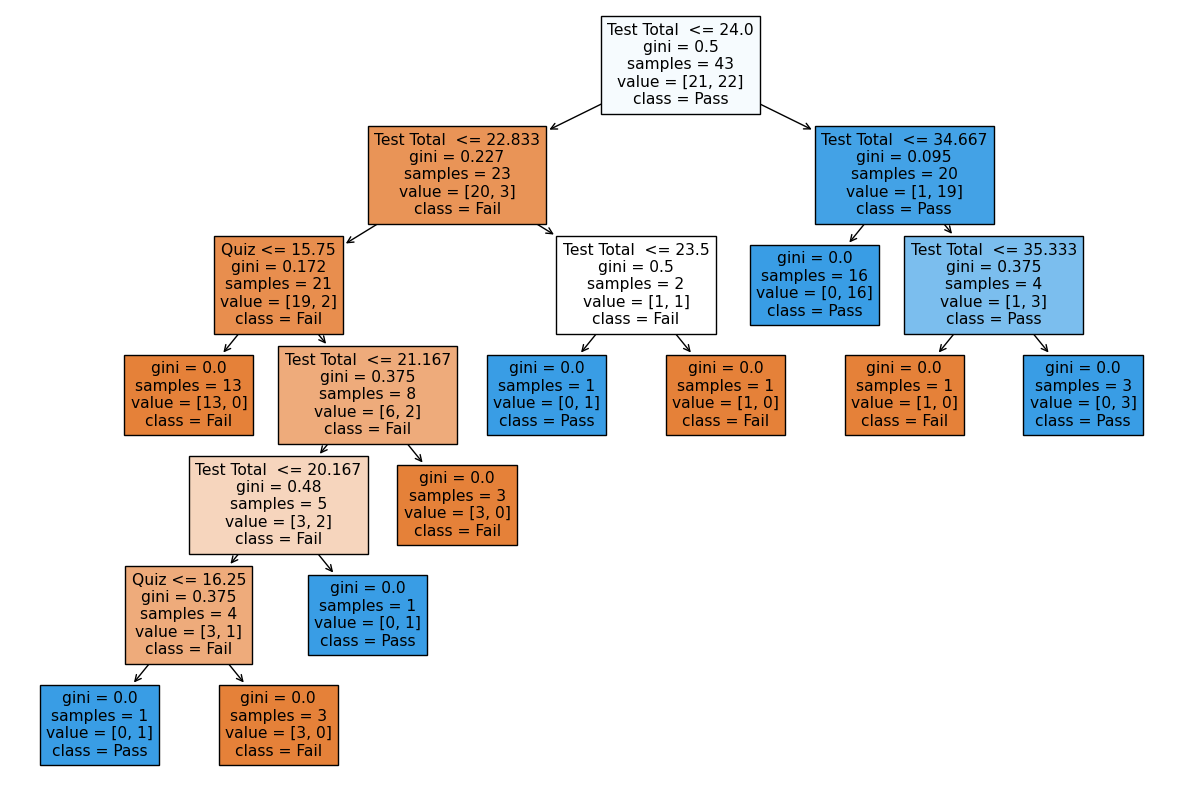

In [23]:
plt.figure(figsize=(15, 10))
plot_tree(DecisionTree, feature_names=X.columns.tolist(), class_names=['Fail', 'Pass'], filled=True)
plt.show()

## Test=45, Quiz= 11, Assignment result=1

In [33]:
print(DecisionTree.predict([[45,11,1]])[0])

1


/home/skanda/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Test=15, Quiz= 11, Assignment result=1


prediction=DecisionTree.predict([[15,14,0]])

In [24]:
print(DecisionTree.predict([[15,11,0]])[0])

0


/home/skanda/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
